In [4]:
import fitsio
import pylab as plt
import numpy as np
%matplotlib inline

No handles with labels found to put in legend.


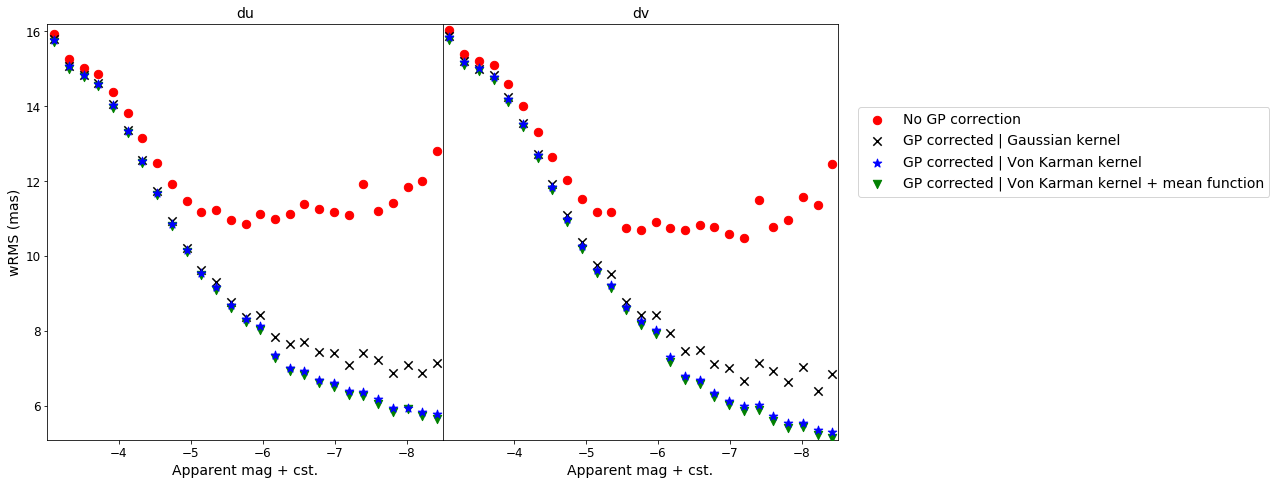

In [6]:
plt.figure(figsize=(18, 7))
plt.subplots_adjust(left=0.04, wspace=0, right=0.65, top=0.95)
for comp in ['u', 'v']:
    if comp=='u':
        plt.subplot(1,2,1)
    else:
        plt.subplot(1,2,2)
    dcomp = fitsio.read('../../../hsc_outputs/v3.3/astro_VK/wrms_vs_mag/wrms_vs_mag_d%s_no_gp_corrected.fits'%(comp))
    dcompcorr_gauss = fitsio.read('../../../hsc_outputs/v3.3/astro_GAUSS/wrms_vs_mag/wrms_vs_mag_d%s_gp_corrected.fits'%(comp))
    dcompcorr_vk = fitsio.read('../../../hsc_outputs/v3.3/astro_VK/wrms_vs_mag/wrms_vs_mag_d%s_gp_corrected.fits'%(comp))
    dcompcorr_vk_mean = fitsio.read('../../../hsc_outputs/v3.3/astro_VK_with_mean/wrms_vs_mag/wrms_vs_mag_d%s_gp_corrected.fits'%(comp))

    mark_size = 70
    # no correction
    if comp=='v':
        LABEL = 'No GP correction'
    else:
        LABEL = None
    plt.scatter(dcomp['X0'][0], dcomp['WRMS'][0], c='r', label=LABEL, s=mark_size, zorder=1)
    
    # gp corrected | gaussian kernel 
    if comp=='v':
        LABEL = 'GP corrected | Gaussian kernel'
    else:
        LABEL = None
    plt.scatter(dcompcorr_gauss['X0'][0], dcompcorr_gauss['WRMS'][0], c='k', marker='x', label=LABEL, s=mark_size, zorder=2)
    
    # gp corrected | von karman kernel 
    if comp=='v':
        LABEL = 'GP corrected | Von Karman kernel'
    else:
        LABEL = None
    plt.scatter(dcompcorr_vk['X0'][0], dcompcorr_vk['WRMS'][0], c='b', marker='*', label=LABEL, s=80, zorder=4)
    
     # gp corrected | von karman kernel + mean function 
    if comp=='v':
        LABEL = 'GP corrected | Von Karman kernel + mean function'
    else:
        LABEL = None
    plt.scatter(dcompcorr_vk_mean['X0'][0], dcompcorr_vk_mean['WRMS'][0], c='g', marker='v', label=LABEL, s=mark_size, zorder=3)
    
    plt.gca().invert_xaxis()
    plt.xlim(-8.5, -3.01)
    plt.gca().invert_xaxis()
    plt.ylim(5.1,16.2)
    #plt.yscale('log')
    plt.title('d'+comp, fontsize=14)
    if comp=='v':
        plt.yticks([],[])
    else:
        plt.ylabel('wRMS (mas)', fontsize=14)
        plt.yticks(fontsize=12)
    
    plt.xlabel('Apparent mag + cst.', fontsize=14)
    plt.xticks(fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0., fontsize=14)
    plt.savefig('../../../../../Desktop/wrms_vs_mag.png')
    